<a href="https://colab.research.google.com/github/adityasaxena-crypto/Ntcc-model-2/blob/main/ntcc_Xbg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import math
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.preprocessing import MinMaxScaler

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1-Contains 220314 readings by 51 sensors taken at an interval of 1 minute over a period of 5 months for a large-scale industrial pump.
2-Each sensor makes some important measurement used to determine the working condition of the pump, like vibration, operative voltage, current drawn, heat generated, RPM etc.
3-The column 'machine_status' indicates the current working condition of the pump. If it is 0, it indicates that the pump is working as expected. If it is 1, the pump is malfunctioning and need repair.

In [6]:
sensor_data = pd.read_csv('/content/drive/MyDrive/data/sensor.csv')
sensor_data = sensor_data.dropna()
print(sensor_data)

            ID  sensor_00  sensor_01  ...  sensor_50  machine_status       timestamp
0            1   2.465394  47.092010  ...   201.3889               0   01-04-18 0:00
1            2   2.465394  47.092010  ...   201.3889               0   01-04-18 0:01
2            3   2.444734  47.352430  ...   203.7037               0   01-04-18 0:02
3            4   2.460474  47.092010  ...   203.1250               0   01-04-18 0:03
4            5   2.445718  47.135410  ...   201.3889               0   01-04-18 0:04
...        ...        ...        ...  ...        ...             ...             ...
143313  143314   2.474248  45.138886  ...   202.8356               0  09-07-18 12:39
143314  143315   2.476215  45.138890  ...   201.0995               0  09-07-18 12:40
143315  143316   2.468345  45.182290  ...   200.8102               0  09-07-18 12:41
143316  143317   2.479167  45.138890  ...   199.9421               0  09-07-18 12:42
143317  143318   2.466377  45.138886  ...   199.3634             

In [15]:
col_names = sensor_data.columns
#print(col_names)
indep_vars = col_names[1:52]
depep_vars = col_names[52]

In [16]:
X = sensor_data[indep_vars]
y = sensor_data[depep_vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000)
model.fit(X_train, y_train)
model.score(X_test , y_test)

0.9999580184718724

In [18]:
print(y_test)

24369     0
109487    0
59706     0
23118     0
99722     0
         ..
88452     0
7726      0
83990     0
80565     0
50642     0
Name: machine_status, Length: 23820, dtype: int64


In [78]:
predictions = model.predict(X_test)
predictionssmol= predictions[:60]
y_test1=y_test[:60]

In [42]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.1981528127623844e-05

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=50, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 
classifier.score(X_test,y_test)

0.9995382031905962

In [66]:
predictions1 = classifier.predict(X_test)


In [22]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9839630562552477

In [30]:
predictions2 = clf.predict(X_test)

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')

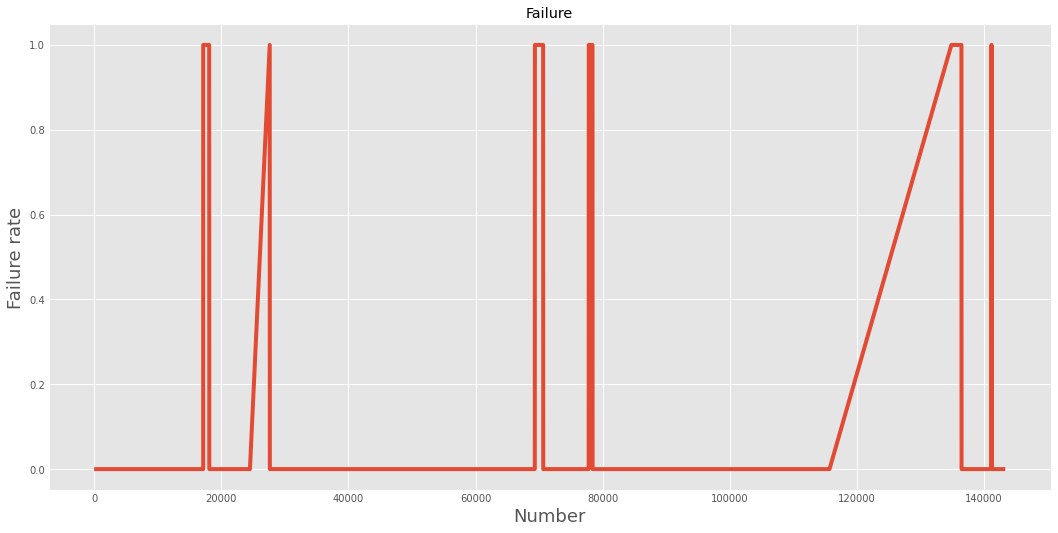

In [89]:
plt.style.use("ggplot")
plt.figure(figsize=(16,8))
plt.title("Failure")
plt.ylabel('Failure rate', fontsize=18)
plt.xlabel('Number',fontsize=18)
plt.plot(sensor_data['machine_status'])
plt.show()

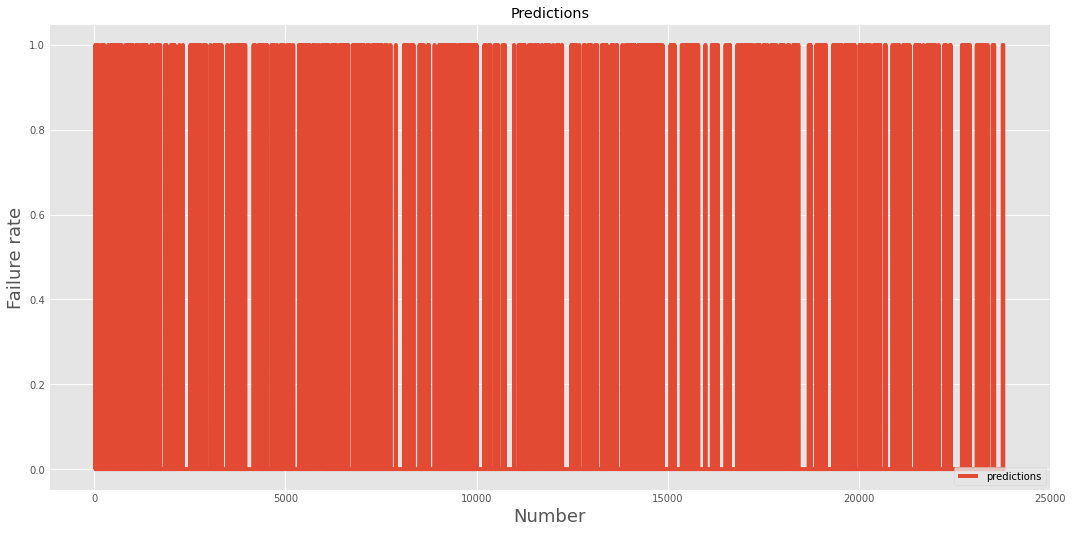

In [95]:
plt.figure(figsize=(16,8))
plt.title('Predictions')
plt.plot(predictions)
plt.ylabel('Failure rate', fontsize=18)
plt.xlabel('Number',fontsize=18)
plt.legend(['predictions'],loc='lower right')
plt.show()


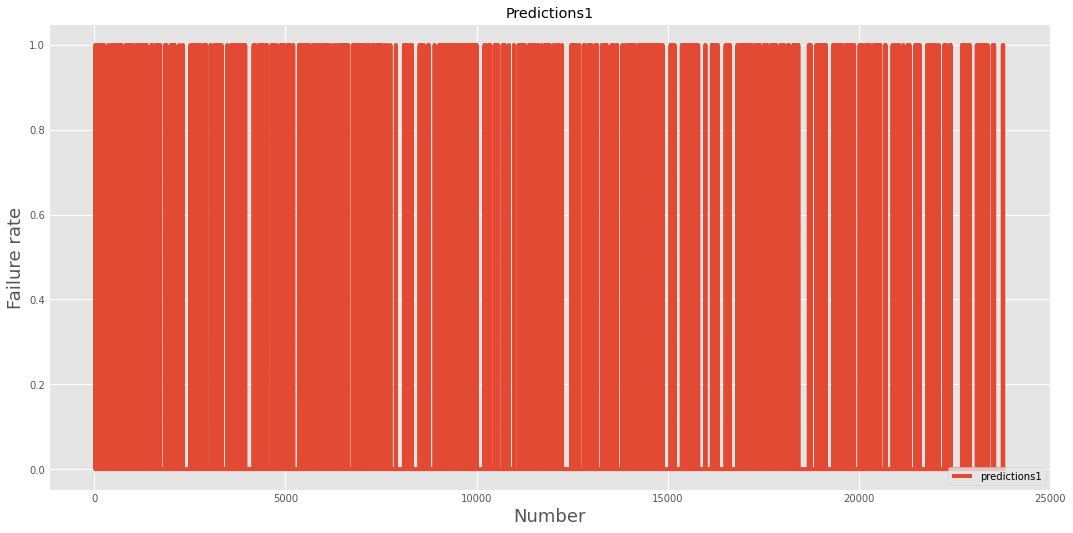

In [96]:
plt.figure(figsize=(16,8))
plt.title('Predictions1')
plt.plot(predictions1)
plt.ylabel('Failure rate', fontsize=18)
plt.xlabel('Number',fontsize=18)
plt.legend(['predictions1'],loc='lower right')
plt.show()

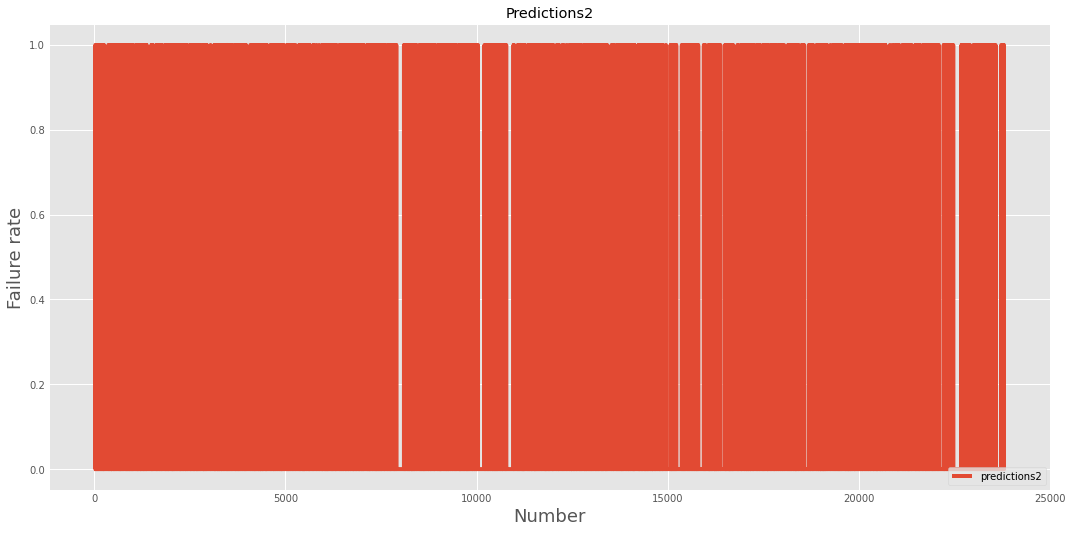

In [97]:
plt.figure(figsize=(16,8))
plt.title('Predictions2')
plt.plot(predictions2)
plt.ylabel('Failure rate', fontsize=18)
plt.xlabel('Number',fontsize=18)
plt.legend(['predictions2'],loc='lower right')
plt.show()

In [93]:
y_test=np.array(y_test)
y_test1=y_test[:60]

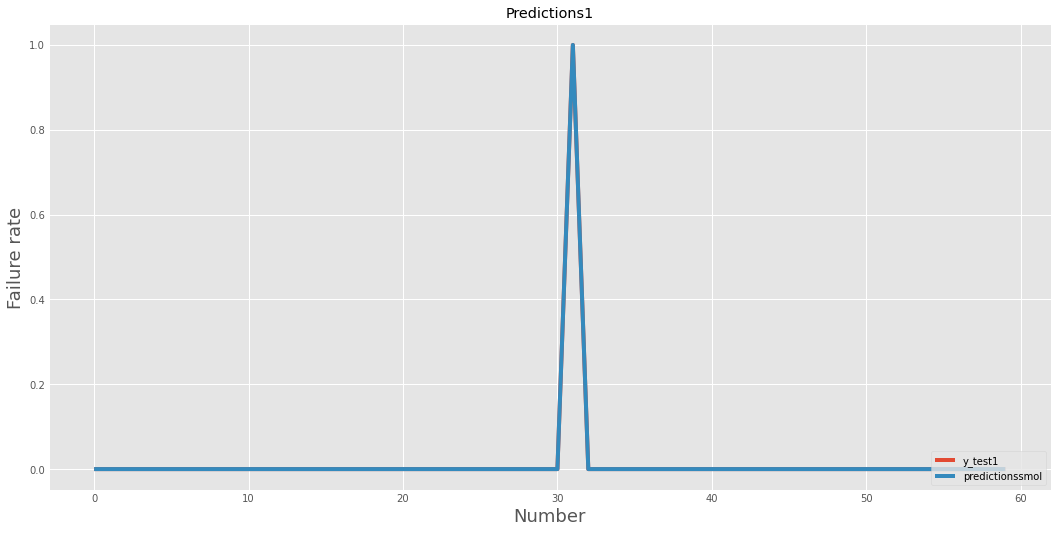

In [98]:
plt.figure(figsize=(16,8))
plt.title('Predictions1')
plt.plot(y_test1)
plt.ylabel('Failure rate', fontsize=18)
plt.xlabel('Number',fontsize=18)
plt.plot(predictionssmol)
plt.legend(['y_test1','predictionssmol'],loc='lower right')
plt.show()